<a href="https://colab.research.google.com/github/Yasaswi-Vanarasi/20191COM0225_NASSCOM_MINIPROJECT/blob/main/20191COM0225_NASSCOM_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TOP SONGS FROM SPOTIFY-EXPLORATORY DATA ANALYSIS**

#**The purpose of this EDA is to find out if any of the features of the song contributes to its popularity. I also builded a few models to predict popularity based on features available in dataset.**

#**UPLOADING THE DATASET**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving top50.csv to top50 (1).csv


#**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

#**Create a dataframe and display  the dataset**

In [ ]:
df =pd.read_csv('top50.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191.90,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302.12,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186.00,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198.12,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175.18,45,7,94


In [ ]:
df.shape

(50, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   Track.Name        50 non-null     object 
 2   Artist.Name       50 non-null     object 
 3   Genre             50 non-null     object 
 4   Beats.Per.Minute  50 non-null     int64  
 5   Energy            50 non-null     int64  
 6   Danceability      50 non-null     int64  
 7   Loudness..dB..    50 non-null     int64  
 8   Liveness          50 non-null     int64  
 9   Valence.          50 non-null     int64  
 10  Length.           50 non-null     float64
 11  Acousticness..    50 non-null     int64  
 12  Speechiness.      50 non-null     int64  
 13  Popularity        50 non-null     int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 5.6+ KB


In [ ]:
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,201.132040,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.100905,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.060000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.640000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.340000,75.000000,46.000000,95.000000


#**DROPPING UNWANTED COLUMNS**

In [ ]:
df.drop(df.columns[0] ,axis=1,inplace=True)

#**HANDLING THE ERRORS IN THE COLUMN DATA TYPE**

In [ ]:
df[['Energy','Liveness','Valence.','Length.','Popularity']]=df[['Energy','Liveness','Valence.','Length.','Popularity']].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track.Name        50 non-null     object 
 1   Artist.Name       50 non-null     object 
 2   Genre             50 non-null     object 
 3   Beats.Per.Minute  50 non-null     int64  
 4   Energy            50 non-null     float64
 5   Danceability      50 non-null     int64  
 6   Loudness..dB..    50 non-null     int64  
 7   Liveness          50 non-null     float64
 8   Valence.          50 non-null     float64
 9   Length.           50 non-null     float64
 10  Acousticness..    50 non-null     int64  
 11  Speechiness.      50 non-null     int64  
 12  Popularity        50 non-null     float64
dtypes: float64(5), int64(5), object(3)
memory usage: 5.2+ KB


#**SEPARATING NUMERICAL AND CATEGORICAL VALUES**

In [ ]:
df_num = df[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']]
df_cat = df[['Track.Name', 'Artist.Name', 'Genre']]

In [ ]:
df_num

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55.0,76,-6,8.0,75.0,191.900,4,3,79.0
1,105,81.0,79,-4,8.0,61.0,302.120,8,9,92.0
2,190,80.0,40,-4,16.0,70.0,186.000,12,46,85.0
3,93,65.0,64,-8,8.0,55.0,198.120,12,19,86.0
4,150,65.0,58,-4,11.0,18.0,175.180,45,7,94.0
5,102,68.0,80,-5,9.0,84.0,220.460,9,4,84.0
6,180,64.0,75,-6,7.0,23.0,131.840,2,29,92.0
7,111,68.0,48,-5,8.0,35.0,202.000,15,9,90.0
8,136,62.0,88,-6,11.0,64.0,157.710,5,10,87.0
9,135,43.0,70,-11,10.0,56.0,194.950,33,38,95.0


In [ ]:
df_cat

,Track.Name,Artist.Name,Genre
0,Señorita,Shawn Mendes,canadian pop
1,China,Anuel AA,reggaeton flow
2,boyfriend (with Social House),Ariana Grande,dance pop
3,Beautiful People (feat. Khalid),Ed Sheeran,pop
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop
6,Ransom,Lil Tecca,trap music
7,How Do You Sleep?,Sam Smith,pop
8,Old Town Road - Remix,Lil Nas X,country rap
9,bad guy,Billie Eilish,electropop


#**Exploratory Data Analysis (EDA)**

#**Distributions for all numeric variables**

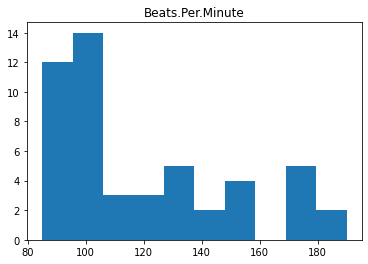

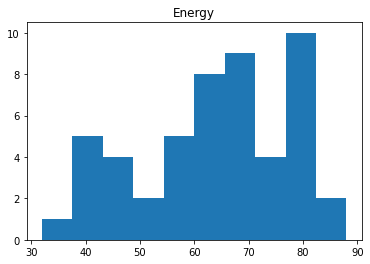

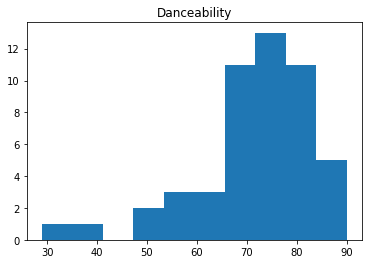

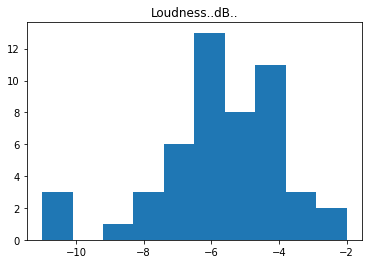

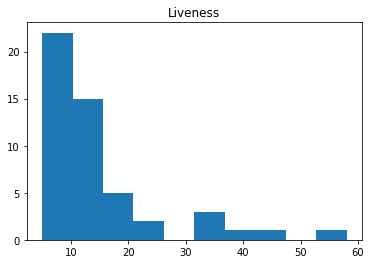

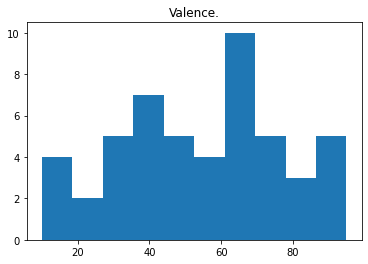

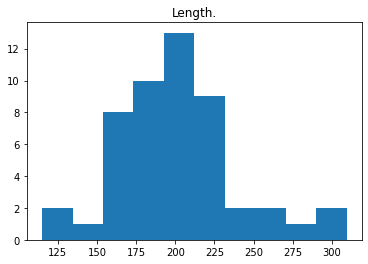

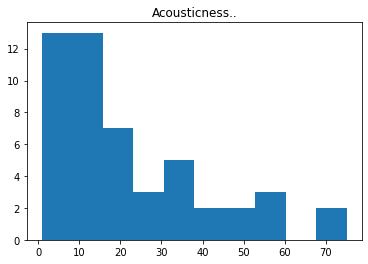

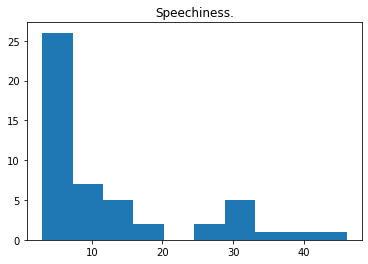

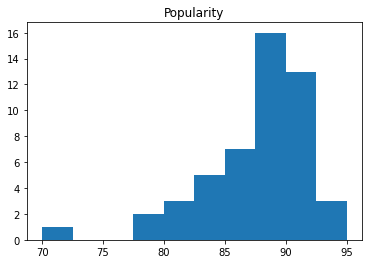

In [ ]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

#**Corelation Table and Heatmap**

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139456,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.223055,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,0.000691,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219517,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.130943,0.021328,-0.125286,0.092564
Valence.,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.016511,-0.052323,-0.053242,-0.317752
Length.,-0.139456,0.223055,0.000691,0.219517,0.130943,-0.016511,1.000000,-0.077299,0.047020,-0.088410
Acousticness..,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.077299,1.000000,0.008293,-0.034684
Speechiness.,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.047020,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.088410,-0.034684,0.238553,1.000000


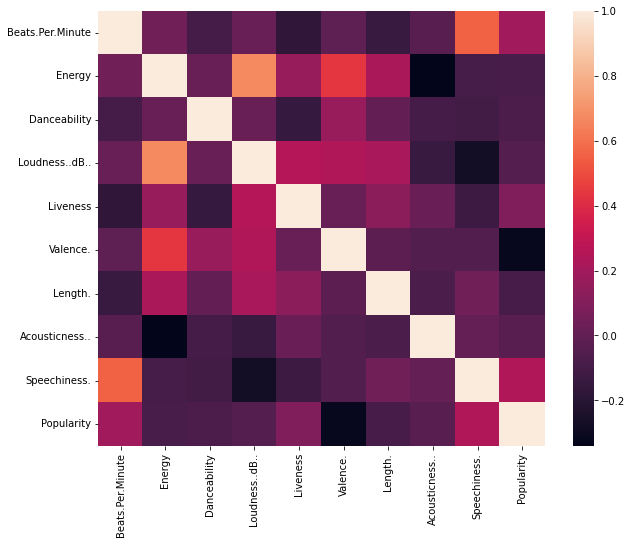

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df_num.corr())
df_num.corr()

#**Characteristic features based on genre.**

In [ ]:
pd.pivot_table(df, index = 'Genre', values = ['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'])

,Acousticness..,Beats.Per.Minute,Danceability,Energy,Length.,Liveness,Loudness..dB..,Popularity,Speechiness.,Valence.
Genre,,,,,,,,,,
atl hip hop,2.000000,98.000000,80.000000,59.000000,200.000000,13.000000,-7.000000,89.000000,15.000000,18.000000
australian pop,69.000000,98.000000,82.000000,59.000000,210.449000,18.000000,-6.000000,83.000000,10.000000,54.000000
big room,18.000000,114.000000,66.000000,72.000000,164.000000,14.000000,-7.000000,89.000000,6.000000,32.000000
boy band,4.000000,138.000000,84.000000,73.000000,181.000000,11.000000,-5.000000,80.000000,6.000000,95.000000
brostep,13.000000,94.000000,67.500000,70.500000,198.785000,37.500000,-2.500000,88.000000,5.000000,55.500000
canadian hip hop,21.666667,109.000000,80.000000,45.000000,193.086667,15.000000,-6.333333,89.666667,5.333333,33.333333
canadian pop,26.500000,120.500000,72.500000,68.500000,191.450000,10.500000,-5.000000,74.500000,4.500000,81.000000
country rap,19.500000,145.000000,79.000000,60.500000,136.355000,11.500000,-6.000000,89.000000,9.000000,56.000000
dance pop,27.000000,111.875000,70.250000,59.875000,202.630000,15.500000,-6.125000,85.750000,15.250000,45.875000


#**Popularity distribution**

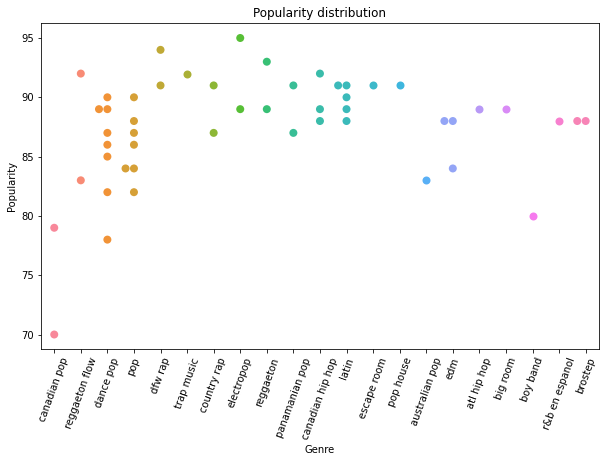

In [ ]:
plt.figure(figsize = (10,6))
#sns.set_theme(style="whitegrid")
plot = sns.swarmplot(x='Genre', y='Popularity', data=df, size=8)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Popularity distribution')
plt.show()

#**Beats per minute distribution**

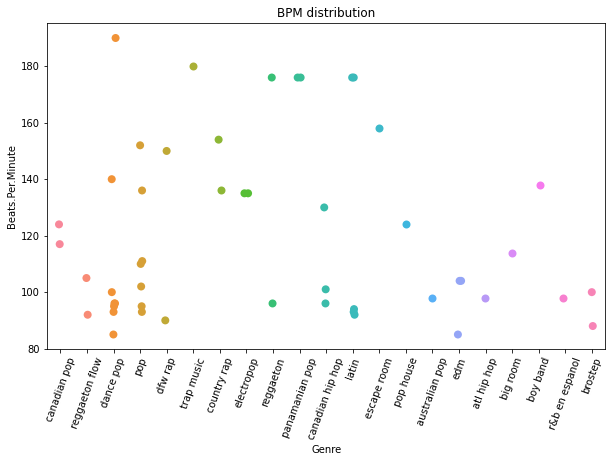

In [ ]:
plt.figure(figsize = (10,6))
#sns.set_theme(style="whitegrid")
plot = sns.stripplot(x='Genre', y='Beats.Per.Minute', data=df, size=8)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('BPM distribution')
plt.show()

#**Which music genres are the most popular**

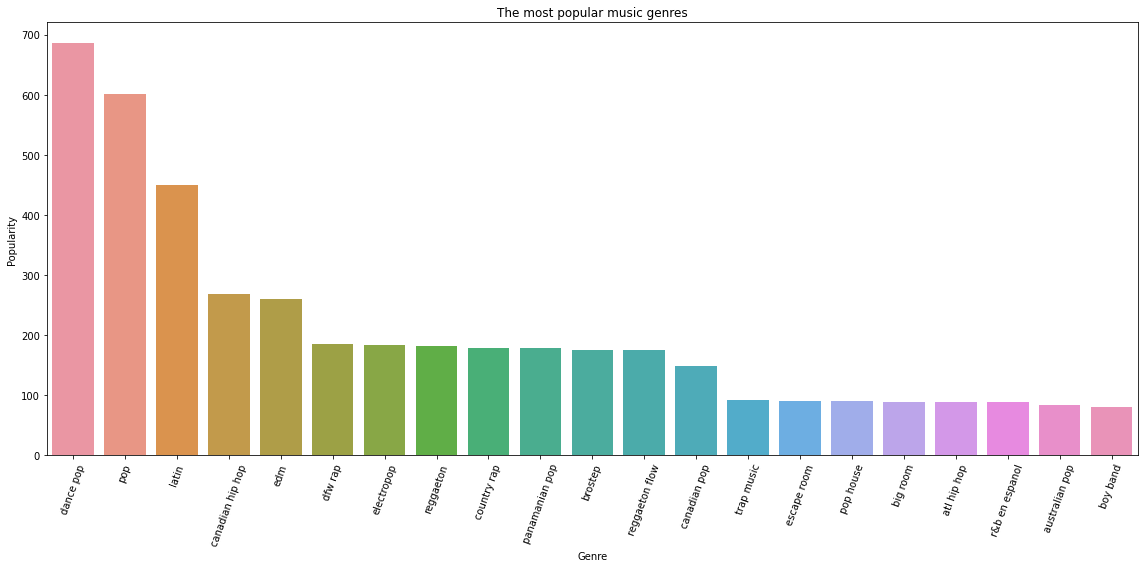

In [ ]:
plt.figure(figsize = (16,8))
genre_grouped = df.groupby('Genre')['Popularity'].sum().sort_values(ascending=False)
chart = sns.barplot(x=genre_grouped.index, y=genre_grouped)
plt.xticks(rotation=70)
plt.title('The most popular music genres')
plt.tight_layout()

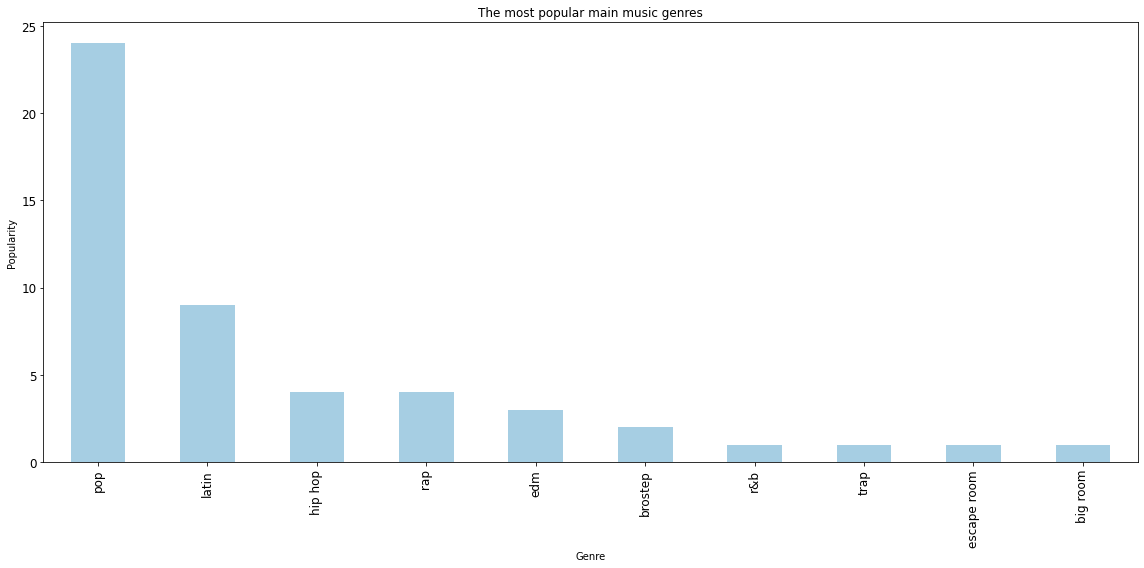

In [ ]:
unique_genre = df['Genre'].drop_duplicates(keep='first') 
main_genres = ['pop','hip hop',' rap','r&b', 'edm', 'trap', 'latin', 'escape room', 'brostep', 'big room'] 
df.loc[df['Genre'].str.contains('reggae'), 'Genre'] = 'latin'
df.loc[df['Genre'].str.contains('boy band'), 'Genre'] = 'pop'

d = {'Key':[],'Value':[]}
for genre in main_genres:
    count = df['Genre'].str.contains(genre).sum()
    d['Key'].append(count)
    d['Value'].append(genre)

dff = pd.DataFrame(d)
dff.sort_values(['Key'], ascending=False, inplace=True)
dff.plot('Value','Key', kind='bar', figsize=(16,8), legend=False, colormap='Paired', fontsize=12)
plt.title('The most popular main music genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.tight_layout()

#**Which artist has the most songs in top list**

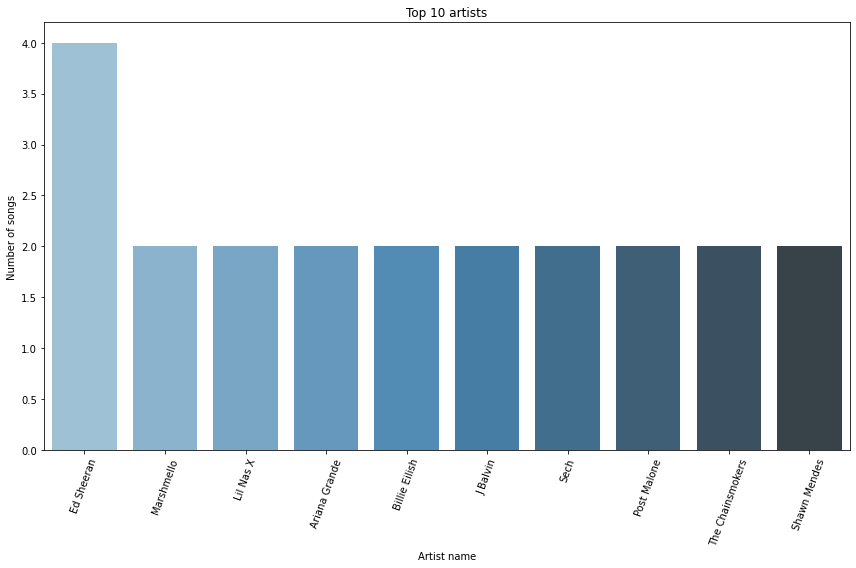

In [ ]:
plt.figure(figsize = (12,8))
artist = df['Artist.Name'].value_counts()[:10]
sns.barplot(x=artist.index, y=artist, palette="Blues_d")
plt.xticks(rotation=70)
plt.xlabel('Artist name')
plt.ylabel('Number of songs')
plt.title('Top 10 artists')
plt.tight_layout()

#**Plot  the data and a linear regression model fit**

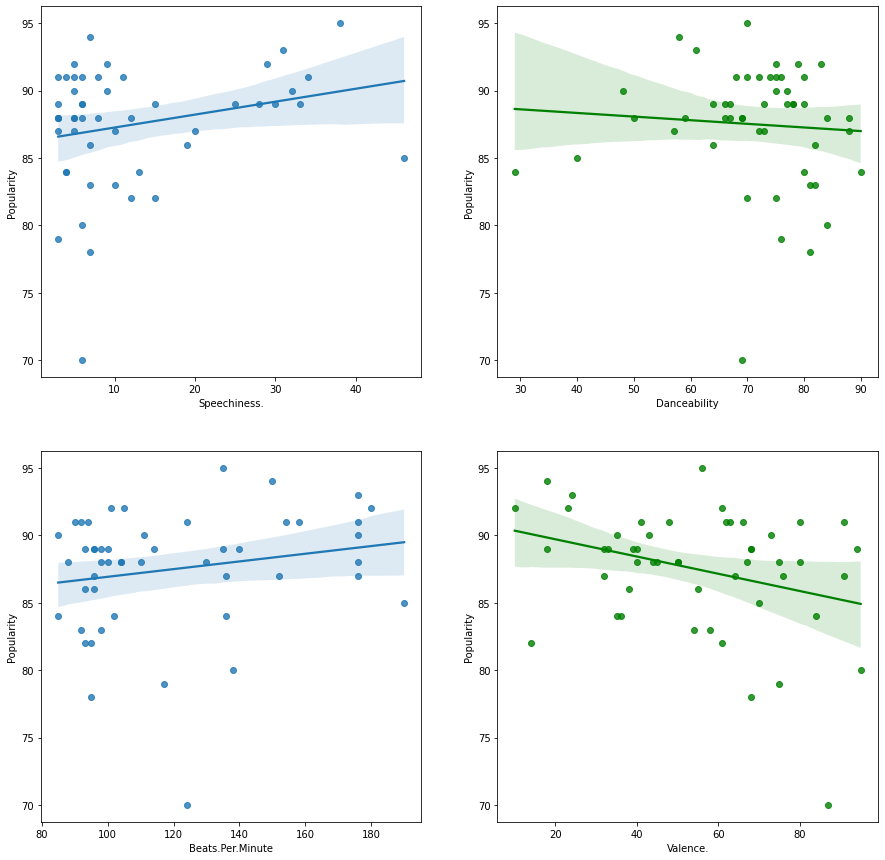

In [ ]:
fig,axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.regplot(x='Danceability',y='Popularity', ax=axs[0,1], data=df,color='g')
sns.regplot(x='Speechiness.',y='Popularity', ax=axs[0,0], data=df)
sns.regplot(x='Beats.Per.Minute',y='Popularity', ax=axs[1,0], data=df)
sns.regplot(x='Valence.',y='Popularity', ax=axs[1,1], data=df,color='g')
plt.show()

#**The target feature and the predictor features**

In [ ]:
scaler = MinMaxScaler()
y=df['Popularity']
X=scaler.fit_transform(df[['Speechiness.','Beats.Per.Minute','Valence.','Liveness']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#**Putting the Algorithms**

#**k-Nearest Neighbors**

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=7) # k na początku 3; pierwiastek z ilości data points u mnie pier z 50
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('RMSE test',rmse)

RMSE test 3.2050130800883503


#**Random Forest**

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('RMSE test',rmse)

RMSE test 5.37277085558901
